In [1]:
car.data <- read.table("car.new", sep = '\t', header = FALSE)

In [2]:
head(car.data)

V1,V2,V3,V4
NIKPRLRSP037996_06012003,99_Others,8379,-0.002628789
NIKPRLRSP038002_06012003,01: Product,2875,-0.021588306
NIKPRLRSP038003_06012003,01: Product,2875,-0.021588306
NIKPRLRSP038004_06012003,03: Technology,4776,-0.103815088
NIKPRLRSP038007_06012003,01: Product,4543,-0.019693618
NIKPRLRSP038008_06012003,01: Product,2875,-0.021588306


## 新しいマッチングでの全体的な傾向

In [3]:
car.val <- as.numeric(car.data$V4) * 100
length(car.val)
head(car.val, n = 100)

[1] 47301

[1]  -0.26287890  -2.15883062  -2.15883062 -10.38150879  -1.96936178
  [6]  -2.15883062  -2.15883062  -2.15883062   0.92900329   1.75760994
 [11]   2.24121269   2.27393745  -3.18059771   2.00399860  -2.36802370
 [16]  -1.23196223  -1.23196223   1.90945221  -2.12315244  -4.05796865
 [21]  -0.33826176  -0.24437982  -1.05430672  -2.10924507   3.05097707
 [26]  -2.16972947  -2.16972947  -1.42072817  -4.62072291  -0.47758679
 [31]  -0.47758679  -2.45872668   2.77902392   2.77902392   2.77902392
 [36]   2.77902392   3.34581824   0.83513126   5.02856512   3.17972786
 [41]  -2.82992180  -2.54797121   1.54953482   3.17681854  -1.83705770
 [46]  -2.05057232   0.95913211   5.01395737  -1.19278953   7.64160672
 [51]   2.17927918  -1.47923101  -3.31819161  -2.47189127  -1.36423028
 [56]  -1.43411641  -3.31819161  -1.40580121  -3.31819161  -0.99738586
 [61]  -0.99738586  -1.20175495  -1.20175495  -1.95697578   0.62755464
 [66]  -3.09867859  -2.67446711  -1.99481373  -1.99481373  -2.67446711
 [71]  -2.53885361   8.93572099   0.62755464   0.62755464   0.62755464
 [76]  -1.43778261  -1.43778261   1.08445706  -1.64016884   0.22731755
 [81]   3.31250162  -0.84850391   5.94542335   5.94542335  -0.16204035
 [86]  -6.58845635   0.06096613  -0.45954427   2.37415164   0.76486592
 [91]  -2.90131969  -0.04462856  -2.62923669   8.96396815   0.77974188
 [96]   0.77974188   0.77974188   0.77974188  -1.34077676  -1.34077676

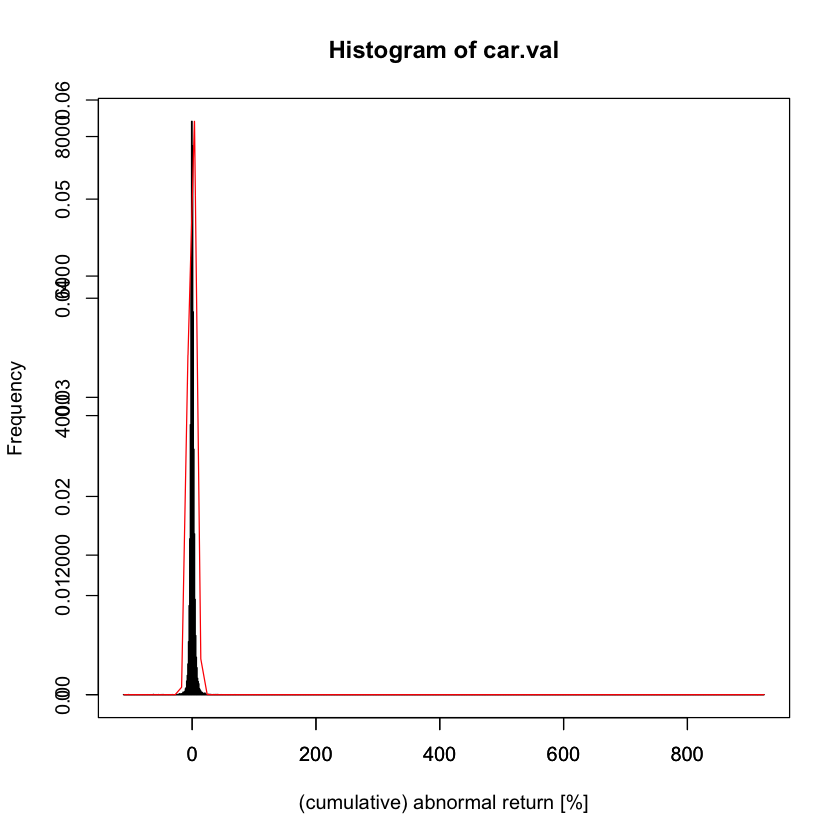

In [16]:
hist(car.val, breaks = 1000, xlim = c(min(car.val),max(car.val)), xlab = "(cumulative) abnormal return [%]")
par(new=T)
curve(dnorm(x, mean=mean(car.val), sd=sqrt(var(car.val))), from=min(car.val), to=max(car.val), col="red", xlab="", ylab="")   # 正規分布を重ね書き

-> 低いCARが無くなったように見えるが、maxが増えただけでminは昔のマッチングと変わっていない。

In [19]:
mean(car.val)

[1] 0.1198485

In [82]:
t.test(car.val)


	One Sample t-test

data:  car.val
t = 1.1832, df = 28353, p-value = 0.2367
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.01665381  0.06738205
sample estimates:
 mean of x 
0.02536412 


-> 全体的に見ると平均は0%と見なして良さそう

In [20]:
sd(car.val)

[1] 5.691239

In [21]:
max(car.val)
min(car.val)

[1] 923.7089

[1] -110.0685

In [22]:
length(car.val)

[1] 47301

In [23]:
length(car.val[car.val >= 10.])
length(car.val[car.val <= -10.])

[1] 590

[1] 337

-> 前のマッチングと比べて、0に近い値の割合が増えた。また、平均値はわずかに正方向に移動し、分散もわずかに大きくなった。

In [25]:
# 両側それぞれ0.1%ずつのデータを除去
trim.min <- sort(car.val)[length(car.val) * 0.001]
trim.max <- sort(car.val)[length(car.val) * 0.999]
trim.min
trim.max
mean(car.val[trim.min <= car.val & car.val <= trim.max])

[1] -20.2615

[1] 21.94011

[1] 0.1059141

## プレスリリースのタイプごとの傾向

In [4]:
types <- c('04: Restructuring', '05: PR', '01: Product', '05: Price', '05: Promotion', '10: Exit', '04: License', '03: Technology', '06: Capacity', '04: Alliance', '06: Order', '04: Contract', '02: Process', '04: M&A')

In [5]:
car.data.type <- car.data[car.data$V2 == '01: Product',]

In [6]:
head(car.data.type)

,V1,V2,V3,V4
2,NIKPRLRSP038002_06012003,01: Product,2875,-0.02158831
3,NIKPRLRSP038003_06012003,01: Product,2875,-0.02158831
5,NIKPRLRSP038007_06012003,01: Product,4543,-0.01969362
6,NIKPRLRSP038008_06012003,01: Product,2875,-0.02158831
7,NIKPRLRSP038012_06012003,01: Product,2875,-0.02158831
8,NIKPRLRSP038015_06012003,01: Product,2875,-0.02158831


In [7]:
quantile(car.data.type$V4)

0%          25%          50%          75%         100% 
-1.100684725 -0.015610381 -0.000762044  0.014793600  0.688248475

In [26]:
print.result <- function(data) {
    hist(data, breaks = 1000, xlim = c(min(data),max(data)), xlab = "(cumulative) abnormal return [%]")
    par(new=T)
    curve(dnorm(x, mean=mean(data), sd=sqrt(var(data))), from=min(data), to=max(data), col="red", xlab="", ylab="")   # 正規分布を重ね書き
}

In [78]:
car.types <- list()
for (type in sort(types)) {
    car.val.type <- as.numeric(car.data[car.data$V2 == type,]$V4) * 100
    #print(c(t, length(car.val.type), mean(car.val.type), sd(car.val.type), min(car.val.type), max(car.val.type)))
    #print(list(c(t, length(car.val.type), mean(car.val.type), sd(car.val.type), min(car.val.type), max(car.val.type))))
    pv <- t.test(car.val.type)$p.value
    car.types <- c(car.types, list(c(type, length(car.val.type), mean(car.val.type), pv, sd(car.val.type), min(car.val.type), max(car.val.type))))
}
Unzip <- function(...) rbind(data.frame(), ...)
car.frame <- do.call(Unzip, car.types)
colnames(car.frame) <- c("prtype", "num", "mean[%]", "p-value (mean != 0)", "sd", "min", "max")
car.frame

# print histgram
#for (t in sort(types)) {
#    car.val.type <- as.numeric(car.data[car.data$V2 == t,]$V4) * 100
#    print.result(car.val.type)
#}

prtype,num,mean[%],p-value (mean != 0),sd,min,max
01: Product,28354,0.0253641236023993,0.236746650305999,3.60973400546599,-110.068472522,68.8248475052
02: Process,416,0.341823316367909,0.0287496701216901,3.17690111402763,-10.3320615941,13.2311654483
03: Technology,3124,0.116674015192258,0.060625912344404,3.47448250128796,-23.7409261662,34.3510804445
04: Alliance,1425,0.338323677784871,0.0369087414271693,6.11443537285894,-62.1670449103,69.5556002667
04: Contract,1463,0.459772013617273,6.11109847320045e-05,4.37437575439815,-31.6809012752,62.0539352644
04: License,597,0.454556892172313,0.000715793634264164,3.26544450779179,-12.4628922647,16.3369740359
04: M&A,986,0.249050085943247,0.0362354525070778,3.72904214706798,-18.9780205652,22.8806091683
04: Restructuring,538,0.0394194138975933,0.853435579853647,4.9469678770237,-54.5392874698,29.6784016258
05: PR,2215,0.01877181598509,0.836631861164915,4.28396333922376,-102.331267772,29.6626633365
05: Price,546,0.149133116998695,0.312752978621587,3.44887859605931,-11.6679313605,20.7254914161


In [79]:
car.frame[order(car.frame$"mean[%]", decreasing = TRUE),]

,prtype,num,mean[%],p-value (mean != 0),sd,min,max
13,06: Order,1281,0.475009674914387,1.69830098908708e-05,3.93753892915936,-17.091056424,33.3529677424
5,04: Contract,1463,0.459772013617273,6.11109847320045e-05,4.37437575439815,-31.6809012752,62.0539352644
6,04: License,597,0.454556892172313,0.000715793634264164,3.26544450779179,-12.4628922647,16.3369740359
2,02: Process,416,0.341823316367909,0.0287496701216901,3.17690111402763,-10.3320615941,13.2311654483
4,04: Alliance,1425,0.338323677784871,0.0369087414271693,6.11443537285894,-62.1670449103,69.5556002667
7,04: M&A,986,0.249050085943247,0.0362354525070778,3.72904214706798,-18.9780205652,22.8806091683
12,06: Capacity,2504,0.196183944208412,0.0051665922877667,3.50743300454744,-48.2215989004,20.4967347643
11,05: Promotion,27,0.165835677325804,0.801978757427157,3.40104949404788,-4.78256176327,8.8915769704
10,05: Price,546,0.149133116998695,0.312752978621587,3.44887859605931,-11.6679313605,20.7254914161
3,03: Technology,3124,0.116674015192258,0.060625912344404,3.47448250128796,-23.7409261662,34.3510804445


平均値でソートしたもの。大事そうなタイプから並んでいたりする。。？

"01: Product"は全体的に見るとほぼ影響なしとなっている

p値は多重検定補正はしていない

### 企業ごとのCARは？